In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from thesis_toolbox.utils import extract_source_region
import pandas as pd

In [2]:
ds = pd.read_csv('../../data/data/results/timeseries_table.csv')

colors_d = {'Taklamakan':'tab:blue','Sources North West of CLP': 'tab:green','Quaidam basin':'tab:purple',
            'Mongolia':'tab:orange', 'Gurbantunggut':'tab:brown', 'Central Asia':'tab:pink', 'Entire domain':'Black'}


def make_pie_chart(df,psize, locations, kind='drydep'):
    dfs = {}
    for location in locations:
        data = df.filter(like=f'{location} {kind} {psize}', axis=1).mean(axis=0)
        colors_d = {'Taklamakan':'tab:blue','Sources North West of CLP': 'tab:green','Quaidam basin':'tab:purple',
                'Mongolia':'tab:orange', 'Jungger Basin':'tab:brown', 'Central Asia':'tab:pink', 'Entire domain':'Black'}
        data = data.drop(f'total {location} {kind} {psize}')
        keys = list(data.keys())
        data = data.rename({k:k.split(' ')[0]for k in keys})
        data = data.rename({'taklamakan': 'Taklamakan', 'north_west':'Sources North West of CLP','quaidam_basin': 'Quaidam basin',
                 'mongolia':'Mongolia', 'jungger_basin':'Gurbantunggut', 'central_asia': 'Central Asia'})
        dfs[location] = data
    dfs = pd.DataFrame(dfs)
    return dfs
    
    
    
    

    
    

In [3]:
locs = ['SHAPOTOU','SACOL','BAODE','LUOCHUAN','LINGTAI','LANTIAN']
dfdp = make_pie_chart(ds, '2micron',  locs,'drydep')
dfwd = make_pie_chart(ds, '2micron',  locs,'wetdep')
df = dfdp + dfwd

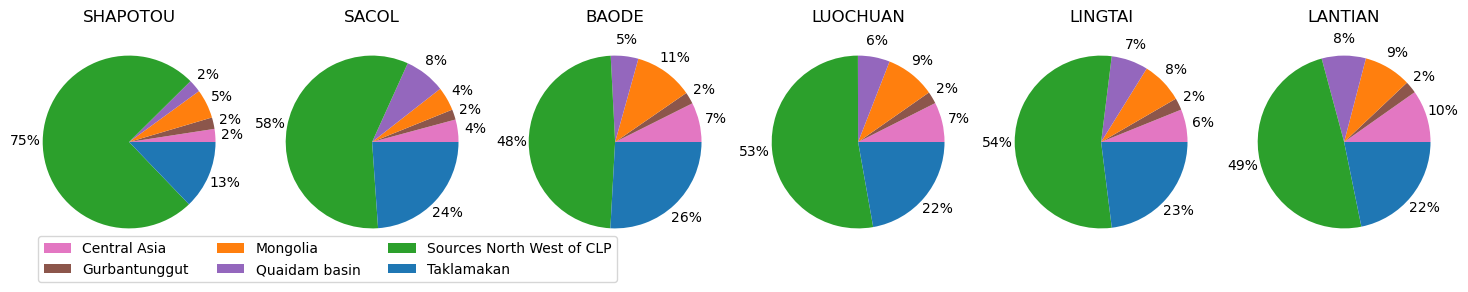

In [15]:
# fig = plt.figure()
df= df.sort_index()
df_color = df.index.map(colors_d)
axes = df.plot.pie(subplots=True, colors =df_color, legend=False, figsize=(18,6), labeldistance=None, autopct='%1.0f%%', pctdistance=1.2, label=False, radius=1.2)
[ax.yaxis.set_visible(False) for ax in axes]
[ax.set_title(loc, pad=22) for ax, loc in zip(axes, locs)] 
fig = plt.gcf()
h,l = axes[0].get_legend_handles_labels()
fig.legend(h,l, bbox_to_anchor=[0.45,0.35], ncol=3)
fig.subplots_adjust(wspace=0.35)
plt.savefig('pie_chart_clay_total_depostion.pdf', bbox_inches='tight')

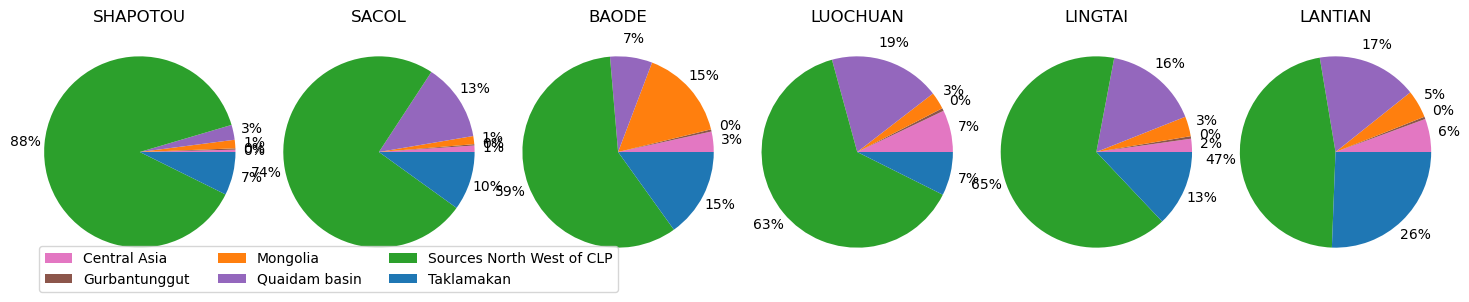

In [17]:
dfdp = make_pie_chart(ds, '20micron',  locs,'drydep')
dfwd = make_pie_chart(ds, '20micron',  locs,'wetdep')
df = dfdp + dfwd
df = df.sort_index()
df_color = df.index.map(colors_d)
axes = df.plot.pie(subplots=True, colors =df_color, legend=False, figsize=(18,6), labeldistance=None, label=False, radius=1.2, autopct='%1.0f%%', pctdistance=1.2)
[ax.yaxis.set_visible(False) for ax in axes] 

[ax.set_title(loc, pad=22) for ax, loc in zip(axes, locs)] 
fig = plt.gcf()
h,l = axes[0].get_legend_handles_labels()
fig.legend(h,l, bbox_to_anchor=[0.45,0.35], ncol=3)
plt.savefig('pie_chart_silt_total_depostion.pdf', bbox_inches='tight')